# Regression Modeling on Russian Housing Prices

A CSCI 271 Data Mining Project (Oct. 2020) by:

- AQUINO, Alec
- ARROBIO, Anne
- VILLAREAL, Rosiel

## Dataset
Over 30,000+ real estate transactions from Aug. 2011 to Jun. 2015 including 390 features representing:
1. Characteristics of the property itself
2. Characteristics of the local area surrounding the property
3. Macroeconomic conditions in Russia

### Example features
- Total area
- Living area
- Number of floors
- Wall material
- Year built
- Number of rooms
- Kitchen area
- District
- Number of cafes & restaurants in neighborhood
- Number of markets  in neighborhood
- Number of schools 
- Share of industrial zones
- Time to nearest public transport
- Inflation PPI
- Annual GDP
- GDP Growth

## Goal
Predict the price of a property using the given features.

# Preprocessing

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Reading csv file
train = pd.read_csv('https://raw.githubusercontent.com/bluerose98/russian_housing_market/main/train.csv')
macro = pd.read_csv('https://raw.githubusercontent.com/bluerose98/russian_housing_market/main/macro.csv')

In [3]:
print(train.shape)
print(macro.shape)

(30471, 292)
(2484, 100)


In [4]:
#Function to display at most 1000 rows and at most 1000 columns
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [5]:
display_all(train.dtypes)

id                                         int64
timestamp                                 object
full_sq                                    int64
life_sq                                  float64
floor                                    float64
max_floor                                float64
material                                 float64
build_year                               float64
num_room                                 float64
kitch_sq                                 float64
state                                    float64
product_type                              object
sub_area                                  object
area_m                                   float64
raion_popul                                int64
green_zone_part                          float64
indust_part                              float64
children_preschool                         int64
preschool_quota                          float64
preschool_education_centers_raion          int64
children_school     

In [6]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 100 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   timestamp                                   2484 non-null   object 
 1   oil_urals                                   2484 non-null   float64
 2   gdp_quart                                   2394 non-null   float64
 3   gdp_quart_growth                            2394 non-null   float64
 4   cpi                                         2453 non-null   float64
 5   ppi                                         2453 non-null   float64
 6   gdp_deflator                                2119 non-null   float64
 7   balance_trade                               2453 non-null   float64
 8   balance_trade_growth                        2394 non-null   float64
 9   usdrub                                      2481 non-null   float64
 10  eurrub     

In [7]:
display_all(train.head())

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [8]:
display_all(train.tail())

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [9]:
#Getting data distribution summary
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,30471.0,1.523792e+04,8.796502e+03,1.0,7620.5,15238.0,22855.5,30473.0
full_sq,30471.0,5.421427e+01,3.803149e+01,0.0,38.0,49.0,63.0,5326.0
life_sq,24088.0,3.440327e+01,5.228573e+01,0.0,20.0,30.0,43.0,7478.0
floor,30304.0,7.670803e+00,5.319989e+00,0.0,3.0,6.5,11.0,77.0
max_floor,20899.0,1.255897e+01,6.756550e+00,0.0,9.0,12.0,17.0,117.0
...,...,...,...,...,...,...,...,...
mosque_count_5000,30471.0,4.424207e-01,6.092689e-01,0.0,0.0,0.0,1.0,2.0
leisure_count_5000,30471.0,8.648814e+00,2.058074e+01,0.0,0.0,2.0,7.0,106.0
sport_count_5000,30471.0,5.279659e+01,4.629266e+01,0.0,11.0,48.0,76.0,218.0
market_count_5000,30471.0,5.987070e+00,4.889219e+00,0.0,1.0,5.0,10.0,21.0


In [10]:
#Displaying the % of null values per feature
display_all(train.isnull().sum().sort_index()/len(train))

0_13_all                                 0.000000
0_13_female                              0.000000
0_13_male                                0.000000
0_17_all                                 0.000000
0_17_female                              0.000000
0_17_male                                0.000000
0_6_all                                  0.000000
0_6_female                               0.000000
0_6_male                                 0.000000
16_29_all                                0.000000
16_29_female                             0.000000
16_29_male                               0.000000
7_14_all                                 0.000000
7_14_female                              0.000000
7_14_male                                0.000000
ID_big_road1                             0.000000
ID_big_road2                             0.000000
ID_bus_terminal                          0.000000
ID_metro                                 0.000000
ID_railroad_station_avto                 0.000000


In [11]:
display_all(macro.head())

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,NaN,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,175.15,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,178.66,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,43.4054,80.12,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,183.44,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.

In [12]:
display_all(macro.tail())

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
2479,2016-10-15,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,69.0250,51.95,-0.408111,80804.3,-0.037267,6.2,7.71,983.04,1966.39,133.55,313.73,23453188,0.016931,NaN,899539,0.382095,12.66,NaN,NaN,NaN,NaN,NaN,NaN,20354.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.76,99.65,69.81,50.2,45.71,38.4,29.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2480,2016-10-16,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,69.0250,51.95,-0.408111,80804.3,-0.037267,6.2,7.71,983.04,1966.39,133.55,313.73,23453188,0.016931,NaN,899539,0.382095,12.66,NaN,NaN,NaN,NaN,NaN,NaN,20354.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.76,99.65,69.81,50.2,45.71,38.4,29.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2481,2016-10-17,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,63.0856,69.3953,51.52,-0.408111,80804.3,-0.037267,6.2,7.71,977.30,1956.95,133.09,313.61,23453188,0.016931,NaN,899539,0.382095,12.66,NaN,NaN,NaN,NaN,NaN,NaN,20354.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.76,99.65,69.81,50.2,45.71,38.4,29.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,2016-10-18,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9512,69.1790,51.68,-0.408111,80804.3,-0.037267,6.2,7.71,986.94,1969.11,132.88,313.21,23453188,0.016931,NaN,899539,0.382095,12.66,NaN,NaN,NaN,NaN,NaN,NaN,20354.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.76,99.65,69.81,50.2,45.71,38.4,29.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2483,2016-10-19,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9512,69.1

In [13]:
#Getting data distribution summary
macro.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
oil_urals,2484.0,86.467157,27.528709,29.1125,61.2833,101.4165,109.31,122.52
gdp_quart,2394.0,16993.230075,3187.074480,9995.8000,14925.0000,17442.1000,19284.10,22016.10
gdp_quart_growth,2394.0,1.523726,2.875659,-4.5000,0.4000,1.3000,4.10,5.20
cpi,2453.0,407.808398,65.895969,315.1000,354.0000,393.0000,469.40,531.00
ppi,2453.0,480.216347,70.286366,337.2000,438.4000,473.5000,520.70,606.10
...,...,...,...,...,...,...,...,...
bandwidth_sports,1826.0,349902.577766,72146.453110,269768.0000,288177.0000,329348.0000,398451.00,463938.00
population_reg_sports_share,1461.0,25.068590,2.449440,22.3700,23.0100,23.0100,26.70,28.20
students_reg_sports_share,1461.0,67.800034,5.168602,63.0300,64.1200,67.8500,67.85,76.20
apartment_build,1826.0,36282.434830,10761.669111,22825.0000,23587.0000,42551.0000,46080.00,46352.00


In [14]:
#Displaying the % of null values per feature
display_all(macro.isnull().sum().sort_index()/len(macro)*100)

apartment_build                               26.489533
apartment_fund_sqm                            26.489533
average_life_exp                              11.795491
average_provision_of_build_contract            0.000000
average_provision_of_build_contract_moscow    14.694042
balance_trade                                  1.247987
balance_trade_growth                           3.623188
bandwidth_sports                              26.489533
baths_share                                   26.489533
brent                                          0.120773
child_on_acc_pre_school                       26.489533
childbirth                                    11.795491
construction_value                            26.489533
cpi                                            1.247987
deposits_growth                                1.247987
deposits_rate                                 16.666667
deposits_value                                 0.000000
divorce_rate                                  26

In [15]:
df = train.merge(macro, how='left', on='timestamp')
df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,#!,1391.710938,89.0495,NaN,NaN,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,#!,1391.710938,89.0495,NaN,NaN,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,#!,1391.710938,89.0495,NaN,NaN,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,155.22,94.02,66.28,51.15,44.25,37.73,30.63,793.319561,#!,1391.710938,89.0495,NaN,NaN,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,155.22,94.02,66.28,51.15,44.25,37.73,30.63,793.319561,#!,1391.710938,89.0495,NaN,NaN,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Checking for Duplicates

In [16]:
df[df.duplicated(keep=False)]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm


## Getting Rid of All The Null Values

In [17]:
#Displaying the % of null values per feature
display_all(df.isnull().sum().sort_index()/len(df))

0_13_all                                      0.000000
0_13_female                                   0.000000
0_13_male                                     0.000000
0_17_all                                      0.000000
0_17_female                                   0.000000
0_17_male                                     0.000000
0_6_all                                       0.000000
0_6_female                                    0.000000
0_6_male                                      0.000000
16_29_all                                     0.000000
16_29_female                                  0.000000
16_29_male                                    0.000000
7_14_all                                      0.000000
7_14_female                                   0.000000
7_14_male                                     0.000000
ID_big_road1                                  0.000000
ID_big_road2                                  0.000000
ID_bus_terminal                               0.000000
ID_metro  

In [18]:
df.shape

(30471, 391)

In [19]:
# Drop columns with > 10% null values
df = df.dropna(axis=1, thresh=.90*len(df))

In [20]:
df.shape

(30471, 314)

In [21]:
#Displaying the % of null values per feature
display_all(df.isnull().sum().sort_index()/len(df))

0_13_all                                      0.000000
0_13_female                                   0.000000
0_13_male                                     0.000000
0_17_all                                      0.000000
0_17_female                                   0.000000
0_17_male                                     0.000000
0_6_all                                       0.000000
0_6_female                                    0.000000
0_6_male                                      0.000000
16_29_all                                     0.000000
16_29_female                                  0.000000
16_29_male                                    0.000000
7_14_all                                      0.000000
7_14_female                                   0.000000
7_14_male                                     0.000000
ID_big_road1                                  0.000000
ID_big_road2                                  0.000000
ID_bus_terminal                               0.000000
ID_metro  

In [22]:
# Drop remaining instances with null values
df = df.dropna(axis = 0)

In [23]:
df.shape
#From (30471, 391) we're now at (28537, 314)

(28537, 314)

In [24]:
#Displaying the % of null values per feature
display_all(df.isnull().sum().sort_index()/len(df))

0_13_all                                      0.0
0_13_female                                   0.0
0_13_male                                     0.0
0_17_all                                      0.0
0_17_female                                   0.0
0_17_male                                     0.0
0_6_all                                       0.0
0_6_female                                    0.0
0_6_male                                      0.0
16_29_all                                     0.0
16_29_female                                  0.0
16_29_male                                    0.0
7_14_all                                      0.0
7_14_female                                   0.0
7_14_male                                     0.0
ID_big_road1                                  0.0
ID_big_road2                                  0.0
ID_bus_terminal                               0.0
ID_metro                                      0.0
ID_railroad_station_avto                      0.0


## Preparing Features

We will deal with categorical and numerical features separately.

In [26]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numerical = df.select_dtypes(include=numerics)
df_categorical = df.select_dtypes(exclude=numerics)

### Dealing with Categorical Features

In [27]:
df_categorical

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,2011-08-20,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,2011-09-01,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,2011-09-05,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2015-06-30,Investment,Otradnoe,no,no,yes,no,yes,no,no,no,no,no,no,no,good
30467,2015-06-30,Investment,Tverskoe,yes,no,no,no,yes,yes,no,no,yes,no,no,no,poor
30468,2015-06-30,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
30469,2015-06-30,Investment,Obruchevskoe,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory


In [28]:
df_categorical = df_categorical.drop(['timestamp'], axis=1)
df_categorical

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,Investment,Otradnoe,no,no,yes,no,yes,no,no,no,no,no,no,no,good
30467,Investment,Tverskoe,yes,no,no,no,yes,yes,no,no,yes,no,no,no,poor
30468,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
30469,Investment,Obruchevskoe,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory


We want to trim the categorical features with too many distinct classes so that when we use one hot encoding,there won't be as many features.

In [30]:
columnNames = df_categorical.columns
for column in columnNames :
    print(len(df_categorical[column].value_counts()), column)

2 product_type
133 sub_area
2 culture_objects_top_25
2 thermal_power_plant_raion
2 incineration_raion
2 oil_chemistry_raion
2 radiation_raion
2 railroad_terminal_raion
2 big_market_raion
2 nuclear_reactor_raion
2 detention_facility_raion
2 water_1line
2 big_road1_1line
2 railroad_1line
5 ecology


In [31]:
#Since sub_area has too much distinct possibilities, we'll be dropping it
df_categorical = df_categorical.drop(['sub_area'], axis=1)

In [32]:
df_categorical = pd.get_dummies(df_categorical, prefix=df_categorical.columns)
df_categorical

,product_type_Investment,product_type_OwnerOccupier,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0
2,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
3,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
4,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
30467,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0
30468,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0
30469,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1


### Dealing with Numerical Features

In [33]:
df_numerical

,id,full_sq,floor,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,...,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,income_per_cap,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,pop_natural_increase,childbirth,mortality,average_life_exp,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_school_per_teacher,students_state_oneshift,provision_nurse,load_on_doctors,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,apartment_fund_sqm
0,1,43,4.0,6.407578e+06,155572,0.189727,0.000070,9576,5,10309,5,0,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,25631,9576,4899,4677,10309,5463,4846,23603,12286,11317,...,1438.74,131.16,204.78,10618898,0.009740,4.10,323275,1.051914,11.84,42688.6,44898.7,0.168917,12838.36,3322.0470,286.952000,106.6,6643.626000,0.014000,0.708000,73976.19863,856.424079,1.10,10.80,9.70,75.79,136.11,77.93,62.89,47.85,41.80,36.77,29.07,1391.710938,89.0495,99.6,8180.755454,6943.0,0.45356,269768.0,230310.0
1,2,34,3.0,9.589337e+06,115352,0.372602,0.049637,6880,5,7759,8,0,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,9266,20165,6880,3466,3414,7759,3909,3850,17700,8998,8702,...,1444.11,131.45,204.92,10618898,0.009740,4.10,323275,1.051914,11.84,42688.6,44898.7,0.168917,12838.36,3322.0470,286.952000,106.6,6643.626000,0.014000,0.708000,73976.19863,856.424079,1.10,10.80,9.70,75.79,136.11,77.93,62.89,47.85,41.80,36.77,29.07,1391.710938,89.0495,99.6,8180.755454,6943.0,0.45356,269768.0,230310.0
2,3,43,2.0,4.808270e+06,101708,0.112560,0.118537,5879,4,6207,7,0,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,31813,31575,25292,7609,17683,5879,3095,2784,6207,3269,2938,14884,7821,7063,...,1458.84,131.08,204.84,10618898,0.009740,4.10,323275,1.051914,11.84,42688.6,44898.7,0.168917,12838.36,3322.0470,286.952000,106.6,6643.626000,0.014000,0.708000,73976.19863,856.424079,1.10,10.80,9.70,75.79,136.11,77.93,62.89,47.85,41.80,36.77,29.07,1391.710938,89.0495,99.6,8180.755454,6943.0,0.45356,269768.0,230310.0
3,4,89,9.0,1.258354e+07,178473,0.194703,0.069753,13087,9,13670,10,0,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,60040,60341,29529,9083,20446,13087,6645,6442,13670,7126,6544,32063,16513,15550,...,1551.58,131.45,205.42,10720911,0.009607,4.00,386388,1.049543,11.92,40311.3,44898.7,0.168917,12856.97,3322.0470,286.952000,106.6,6643.626000,0.014000,0.708000,73976.19863,856.424079,1.10,10.80,9.70,75.79,155.22,94.02,66.28,51.15,44.25,37.73,30.63,1391.710938,89.0495,99.6,8180.755454,6943.0,0.45356,269768.0,230310.0
4,5,77,4.0,8.398461e+06,108171,0.015234,0.037316,5706,7,6748,9,0,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,34236,33807,26760,8563,18197,5706,2982,2724,6748,3664,3084,15237,8113,7124,...,1492.83,131.19,198.24,10920215,0.018590,4.00,386388,1.049543,11.92,40311.3,44898.7,0.168917,12856.97,3322.0470,286.952000,106.6,6643.626000,0.014000,0.708000,73976.19863,856.424079,1.10,10.80,9.70,75.79,155.22,94.02,66.28,51.15,44.25,37.73,30.63,1391.710938,89.0495,99.6,8180.755454,6943.0,0.45356,269768.0,230310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [34]:
#We're dropping the column id since it doesn't offer any important information
df_numerical = df_numerical.drop(['id'], axis=1)
df_numerical

,full_sq,floor,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,...,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,income_per_cap,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,pop_natural_increase,childbirth,mortality,average_life_exp,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_school_per_teacher,students_state_oneshift,provision_nurse,load_on_doctors,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,apartment_fund_sqm
0,43,4.0,6.407578e+06,155572,0.189727,0.000070,9576,5,10309,5,0,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,25631,9576,4899,4677,10309,5463,4846,23603,12286,11317,17508,...,1438.74,131.16,204.78,10618898,0.009740,4.10,323275,1.051914,11.84,42688.6,44898.7,0.168917,12838.36,3322.0470,286.952000,106.6,6643.626000,0.014000,0.708000,73976.19863,856.424079,1.10,10.80,9.70,75.79,136.11,77.93,62.89,47.85,41.80,36.77,29.07,1391.710938,89.0495,99.6,8180.755454,6943.0,0.45356,269768.0,230310.0
1,34,3.0,9.589337e+06,115352,0.372602,0.049637,6880,5,7759,8,0,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,9266,20165,6880,3466,3414,7759,3909,3850,17700,8998,8702,15164,...,1444.11,131.45,204.92,10618898,0.009740,4.10,323275,1.051914,11.84,42688.6,44898.7,0.168917,12838.36,3322.0470,286.952000,106.6,6643.626000,0.014000,0.708000,73976.19863,856.424079,1.10,10.80,9.70,75.79,136.11,77.93,62.89,47.85,41.80,36.77,29.07,1391.710938,89.0495,99.6,8180.755454,6943.0,0.45356,269768.0,230310.0
2,43,2.0,4.808270e+06,101708,0.112560,0.118537,5879,4,6207,7,0,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,31813,31575,25292,7609,17683,5879,3095,2784,6207,3269,2938,14884,7821,7063,19401,...,1458.84,131.08,204.84,10618898,0.009740,4.10,323275,1.051914,11.84,42688.6,44898.7,0.168917,12838.36,3322.0470,286.952000,106.6,6643.626000,0.014000,0.708000,73976.19863,856.424079,1.10,10.80,9.70,75.79,136.11,77.93,62.89,47.85,41.80,36.77,29.07,1391.710938,89.0495,99.6,8180.755454,6943.0,0.45356,269768.0,230310.0
3,89,9.0,1.258354e+07,178473,0.194703,0.069753,13087,9,13670,10,0,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,60040,60341,29529,9083,20446,13087,6645,6442,13670,7126,6544,32063,16513,15550,3292,...,1551.58,131.45,205.42,10720911,0.009607,4.00,386388,1.049543,11.92,40311.3,44898.7,0.168917,12856.97,3322.0470,286.952000,106.6,6643.626000,0.014000,0.708000,73976.19863,856.424079,1.10,10.80,9.70,75.79,155.22,94.02,66.28,51.15,44.25,37.73,30.63,1391.710938,89.0495,99.6,8180.755454,6943.0,0.45356,269768.0,230310.0
4,77,4.0,8.398461e+06,108171,0.015234,0.037316,5706,7,6748,9,0,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,34236,33807,26760,8563,18197,5706,2982,2724,6748,3664,3084,15237,8113,7124,5164,...,1492.83,131.19,198.24,10920215,0.018590,4.00,386388,1.049543,11.92,40311.3,44898.7,0.168917,12856.97,3322.0470,286.952000,106.6,6643.626000,0.014000,0.708000,73976.19863,856.424079,1.10,10.80,9.70,75.79,155.22,94.02,66.28,51.15,44.25,37.73,30.63,1391.710938,89.0495,99.6,8180.755454,6943.0,0.45356,269768.0,230310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [35]:
targetdf = df_numerical['price_doc']
df_numerical = df_numerical.drop(['price_doc'], axis=1) 

In [36]:
targetdf = targetdf.reset_index()
targetdf

,index,price_doc
0,0,5850000
1,1,6000000
2,2,5700000
3,3,13100000
4,4,16331452
...,...,...
28532,30466,7400000
28533,30467,25000000
28534,30468,6970959
28535,30469,13500000


#### Features Selection on Numerical Features Using Variance Threshold

In [37]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = 0.75
thresholder = VarianceThreshold(threshold=(var_thresh * (1 - var_thresh)))
thresholder.fit(df_numerical)
df_numerical = df_numerical[df_numerical.columns[thresholder.get_support(indices=True)]]

In [38]:
df_numerical

,full_sq,floor,area_m,raion_popul,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,...,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,gdp_annual,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_rate,mortgage_value,mortgage_rate,income_per_cap,salary,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,invest_fixed_capital_per_cap,invest_fixed_assets,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_school_per_teacher,students_state_oneshift,provision_nurse,load_on_doctors,turnover_catering_per_cap,bandwidth_sports,apartment_fund_sqm
0,43,4.0,6.407578e+06,155572,9576,5,10309,5,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,25631,9576,4899,4677,10309,5463,4846,23603,12286,11317,17508,9425,8083,18654,...,354.0,420.7,86.721,15.459,10.1,29.0048,41.7681,108.62,46308.5,1575.33,1438.74,131.16,204.78,10618898,4.10,323275,11.84,42688.6,44898.7,12838.36,3322.0470,286.952000,106.6,6643.626000,73976.19863,856.424079,136.11,77.93,62.89,47.85,41.80,36.77,29.07,1391.710938,89.0495,99.6,8180.755454,6943.0,269768.0,230310.0
1,34,3.0,9.589337e+06,115352,6880,5,7759,8,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,9266,20165,6880,3466,3414,7759,3909,3850,17700,8998,8702,15164,7571,7593,13729,...,354.0,420.7,86.721,15.459,10.1,28.9525,41.7537,109.31,46308.5,1578.91,1444.11,131.45,204.92,10618898,4.10,323275,11.84,42688.6,44898.7,12838.36,3322.0470,286.952000,106.6,6643.626000,73976.19863,856.424079,136.11,77.93,62.89,47.85,41.80,36.77,29.07,1391.710938,89.0495,99.6,8180.755454,6943.0,269768.0,230310.0
2,43,2.0,4.808270e+06,101708,5879,4,6207,7,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,31813,31575,25292,7609,17683,5879,3095,2784,6207,3269,2938,14884,7821,7063,19401,9045,10356,11252,...,354.0,420.7,86.721,15.459,10.1,28.8082,41.7114,111.36,46308.5,1596.17,1458.84,131.08,204.84,10618898,4.10,323275,11.84,42688.6,44898.7,12838.36,3322.0470,286.952000,106.6,6643.626000,73976.19863,856.424079,136.11,77.93,62.89,47.85,41.80,36.77,29.07,1391.710938,89.0495,99.6,8180.755454,6943.0,269768.0,230310.0
3,89,9.0,1.258354e+07,178473,13087,9,13670,10,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,60040,60341,29529,9083,20446,13087,6645,6442,13670,7126,6544,32063,16513,15550,3292,1450,1842,24934,...,353.2,434.4,86.721,15.386,10.1,28.9655,41.4014,114.29,46308.5,1703.86,1551.58,131.45,205.42,10720911,4.00,386388,11.92,40311.3,44898.7,12856.97,3322.0470,286.952000,106.6,6643.626000,73976.19863,856.424079,155.22,94.02,66.28,51.15,44.25,37.73,30.63,1391.710938,89.0495,99.6,8180.755454,6943.0,269768.0,230310.0
4,77,4.0,8.398461e+06,108171,5706,7,6748,9,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,34236,33807,26760,8563,18197,5706,2982,2724,6748,3664,3084,15237,8113,7124,5164,2583,2581,11631,...,353.2,434.4,86.721,15.386,10.1,29.4625,41.5902,110.08,46308.5,1617.01,1492.83,131.19,198.24,10920215,4.00,386388,11.92,40311.3,44898.7,12856.97,3322.0470,286.952000,106.6,6643.626000,73976.19863,856.424079,155.22,94.02,66.28,51.15,44.25,37.73,30.63,1391.710938,89.0495,99.6,8180.755454,6943.0,269768.0,230310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

#### Dealing with Multicollinearity among Numerical Features using VIF Scores

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

#From https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
#Normally, the removal of each feature should be done iteratively, but in the interests of saving time, 
#we will be trimming all the features that score infinity
noMoreInfinites = -1
counter = 0
while (noMoreInfinites == -1) :
    counter += 1
    print(counter, df_numerical.shape)
    
    vifScores = calc_vif(df_numerical)
    vifScores = vifScores.replace([np.inf, -np.inf], np.nan)
    numberOfNull = vifScores['VIF'].isnull().sum()
    
    if (numberOfNull > 0) :
        vifScores = vifScores.dropna()
        featuresToKeep = vifScores['variables']
        df_numerical = df_numerical[featuresToKeep]
        
    if (numberOfNull == 0) :
        break

1 (28537, 268)


/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


2 (28537, 188)


In [41]:
df_numerical

,full_sq,floor,area_m,preschool_education_centers_raion,school_education_centers_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,7_14_male,7_14_female,ID_metro,metro_min_avto,metro_km_avto,kindergarten_km,school_km,park_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,...,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,balance_trade,balance_trade_growth,usdrub,eurrub,brent,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_rate,mortgage_value,mortgage_rate,income_per_cap,fixed_basket,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco
0,43,4.0,6.407578e+06,5,5,1,0,7,3,0,16,1,5463,4846,1,2.590241,1.131260,0.145700,0.177975,2.158587,1.080934,23.683460,1.804127,3.633334,1.0,5.419893,6.905893,1,3.299822,1.422391,10.918587,13.100618,13.675657,15.156211,1.422391,1,3.830951,5,1.305159,14.231961,...,29,807385,52,4036616,708.57,1185.71,947.14,13,22,1,0,52,4,109.3100,14313.7,3.3,354.0,420.7,15.459,10.1,29.0048,41.7681,108.62,1575.33,1438.74,131.16,204.78,10618898,4.10,323275,11.84,42688.6,12838.36,136.11,77.93,62.89,47.85,41.80,36.77,29.07
1,34,3.0,9.589337e+06,5,8,1,0,6,1,1,3,0,3909,3850,2,0.936700,0.647337,0.147754,0.273345,0.550690,0.966479,1.317476,4.655004,8.648587,2.0,3.641773,4.679745,2,0.783160,9.503405,3.103996,6.444333,8.132640,8.698054,2.887377,2,3.103996,4,0.694536,9.242586,...,66,2690465,40,2034942,673.81,1148.81,911.31,15,29,1,10,66,14,109.3100,14313.7,3.3,354.0,420.7,15.459,10.1,28.9525,41.7537,109.31,1578.91,1444.11,131.45,204.92,10618898,4.10,323275,11.84,42688.6,12838.36,136.11,77.93,62.89,47.85,41.80,36.77,29.07
2,43,2.0,4.808270e+06,4,7,1,0,5,1,0,0,1,3269,2938,3,2.120999,1.637996,0.049102,0.158072,0.374848,0.939275,4.912660,3.381083,11.996480,3.0,1.277658,1.701420,3,3.945073,5.604800,2.927487,6.963403,8.054252,9.067885,0.647250,3,2.927487,4,0.700691,9.540544,...,43,1478160,35,1572990,702.68,1196.43,949.55,11,27,0,4,67,10,109.3100,14313.7,3.3,354.0,420.7,15.459,10.1,28.8082,41.7114,111.36,1596.17,1458.84,131.08,204.84,10618898,4.10,323275,11.84,42688.6,12838.36,136.11,77.93,62.89,47.85,41.80,36.77,29.07
3,89,9.0,1.258354e+07,9,10,1,0,17,6,0,11,4,7126,6544,4,1.489049,0.984537,0.179441,0.236455,0.078090,0.451173,15.623710,2.017080,14.317640,4.0,3.816045,5.271136,4,1.579164,2.677824,14.606501,17.457198,18.309433,19.487005,2.677824,1,2.780449,17,1.999265,17.478380,...,8,244166,22,942180,931.58,1552.63,1242.11,4,4,0,0,26,3,111.2900,14313.7,3.3,353.2,434.4,15.386,10.1,28.9655,41.4014,114.29,1703.86,1551.58,131.45,205.42,10720911,4.00,386388,11.92,40311.3,12856.97,155.22,94.02,66.28,51.15,44.25,37.73,30.63
4,77,4.0,8.398461e+06,7,9,4,2,25,2,0,10,93,3664,3084,5,1.257186,0.876620,0.247901,0.376838,0.258289,0.392871,10.683540,2.936581,11.903910,5.0,1.595898,2.156284,113,0.857764,11.616653,1.721834,0.046810,0.787593,2.578671,1.721834,4,3.133531,10,0.084113,1.595898,...,689,8404624,114,3503058,853.88,1411.45,1132.66,135,236,2,91,195,14,111.2900,14313.7,3.3,353.2,434.4,15.386,10.1,29.4625,41.5902,110.08,1617.01,1492.83,131.19,198.24,10920215,4.00,386388,11.92,40311.3,12856.97,155.22,94.02,66.28,51.15,44.25,37.73,30.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [42]:
maxScore = vifScores['VIF'].max()
counter = 0
trimSize = 10 #Ideally, we would trim by 1 for each iteration, but to save time we'll be using a larger trim size
while (True) : 
    if (maxScore < 25) :
        trimSize = 1
        
    elif (maxScore < 50) :
        trimSize = 3
    
    elif (maxScore < 100) :
        trimSize = 5
        
    if (maxScore < 10) :
        break #We want to keep only those values with a VIF score lower than 10
    
    #Drop the feature with the highest VIF score
    vifScores = vifScores.sort_values(by=['VIF'], ascending=False)
    vifScores = vifScores.iloc[trimSize:] #Drop the rows with the highest VIF values
    maxScore = vifScores['VIF'].max()
    
    featuresToKeep = vifScores['variables']
    df_numerical = df_numerical[featuresToKeep]
    
    counter += 1
    print(counter, vifScores.shape, maxScore)
    
    #Recalculate VIF Scores
    vifScores = calc_vif(df_numerical)

1 (178, 2) 113999.94611756754
2 (168, 2) 6438.026753117378
3 (158, 2) 863.920943843014
4 (148, 2) 321.5272273140393
5 (138, 2) 176.97927950187236
6 (128, 2) 105.71525705306945
7 (118, 2) 77.7431638163942
8 (113, 2) 63.75274027149345
9 (108, 2) 49.04758373206175
10 (105, 2) 43.33178487568927
11 (102, 2) 39.05663586614671
12 (99, 2) 35.29735255997389
13 (96, 2) 33.38578633038837
14 (93, 2) 27.880640064280254
15 (90, 2) 23.829513398627636
16 (89, 2) 23.340203754391986
17 (88, 2) 22.028847306422314
18 (87, 2) 20.96220753455507
19 (86, 2) 20.724041562558067
20 (85, 2) 20.51222480976245
21 (84, 2) 20.424029380038466
22 (83, 2) 20.383938251165947
23 (82, 2) 18.868865417692536
24 (81, 2) 18.809857019412338
25 (80, 2) 17.736730311012014
26 (79, 2) 17.667120734200207
27 (78, 2) 17.549488731639244
28 (77, 2) 16.918246322381773
29 (76, 2) 16.56698912217763
30 (75, 2) 16.09472040723643
31 (74, 2) 15.586935098915834
32 (73, 2) 15.23661522167926
33 (72, 2) 14.437334507489718
34 (71, 2) 14.08187122052

In [43]:
display_all(vifScores)

,variables,VIF
0,cafe_count_500_price_1500,9.407278
1,cafe_count_500_na_price,8.952904
2,ice_rink_km,7.318385
3,trc_sqm_2000,8.321672
4,trc_sqm_3000,8.277330
5,ID_bus_terminal,8.241666
6,green_part_1000,8.178517
7,office_km,7.518539
8,trc_sqm_1500,7.991692
9,office_count_500,7.933705


In [44]:
df_numerical
#From 297 features, we were able to trim it down to 60

,cafe_count_500_price_1500,cafe_count_500_na_price,ice_rink_km,trc_sqm_2000,trc_sqm_3000,ID_bus_terminal,green_part_1000,office_km,trc_sqm_1500,office_count_500,shopping_centers_raion,culture_objects_top_25_raion,office_sqm_2000,school_education_centers_raion,big_church_count_500,leisure_count_1000,ID_railroad_station_walk,sport_count_1000,kindergarten_km,office_sqm_1000,hospice_morgue_km,cemetery_km,industrial_km,trc_sqm_1000,prom_part_1000,prom_part_3000,big_road1_km,fitness_km,cafe_count_500_price_1000,additional_education_raion,market_count_3000,ID_metro,ID_railroad_station_avto,additional_education_km,railroad_km,catering_km,green_part_500,ID_railroad_terminal,church_synagogue_km,trc_sqm_500,cafe_count_500_price_4000,market_count_1500,ID_big_road1,ID_big_road2,sport_count_500,mosque_count_5000,trc_count_500,healthcare_centers_raion,park_km,mortgage_value,prom_part_500,office_sqm_500,public_transport_station_min_walk,floor,market_count_1000,mosque_count_3000,balance_trade_growth,full_sq,university_top_20_raion,gdp_quart_growth
0,0,0,1.107594,1244891,1419204,1,7.36,0.637189,171420,0,16,0,188854,5,0,0,1.0,6,0.145700,30500,2.392353,1.804127,1.080934,55600,0.00,13.55,1.422391,0.485841,0,3,1,1,1,0.947962,1.305159,0.516838,0.00,101,0.628187,0,0,1,1,5,1,1,0,1,2.158587,323275,0.00,0,3.299822,4.0,1,0,10.1,43,0,3.3
1,0,0,8.972823,179065,491565,2,26.66,0.688796,127065,0,3,1,165510,8,0,4,2.0,2,0.147754,86600,2.543747,4.655004,0.966479,94065,0.07,27.32,2.887377,0.668364,3,1,1,2,2,1.072315,0.694536,0.230287,25.14,32,0.471447,0,1,0,2,4,0,1,0,1,0.550690,323275,0.00,0,0.783160,3.0,0,0,10.1,34,0,3.3
2,1,0,1.978517,52550,52550,3,4.99,1.543049,2600,0,0,0,100200,7,0,0,3.0,5,0.049102,0,0.621357,3.381083,0.939275,0,0.29,26.46,0.647250,0.733101,2,1,6,3,3,0.391957,0.700691,0.190462,1.67,5,0.755946,0,0,5,3,4,0,0,0,1,0.374848,323275,0.00,0,3.945073,2.0,3,0,10.1,43,0,3.3
3,2,0,6.483172,89492,205756,1,19.25,0.934273,89492,0,11,0,11000,10,0,0,4.0,3,0.179441,11000,3.549558,2.017080,0.451173,80780,10.35,3.57,2.677824,0.623484,0,6,3,4,4,0.892674,1.999265,0.465820,17.36,83,1.561505,0,0,2,1,17,0,0,0,1,0.078090,386388,0.57,0,1.579164,9.0,1,0,10.1,89,0,3.3
4,11,3,3.975401,564843,2296870,4,3.34,0.077901,445900,15,10,0,1625130,9,1,6,5.0,7,0.247901,420952,1.864637,2.936581,0.392871,158200,8.29,8.62,1.721834,0.220288,10,2,5,5,113,0.810801,0.084113,0.026102,3.56,113,0.121681,45000,0,2,4,10,3,2,1,4,0.258289,386388,4.44,293699,0.857764,4.0,0,1,10.1,77,2,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2,1,0.720736,357757,745130,4,10.51,1.103579,109230,0,9,0,224342,4,0,0,1.0,3,0.132645,0,3.817988,1.933090,0.702853,79970,7.72,21.25,3.096057,0.063432,4,3,3,24,1,0.167718,1.137603,0.055377,3.38,101,0.612359,41970,0,2,5,1,1,1,2,1,1.972527,371332,0.00,0,1.119101,7.0,1,1,32.9,44,0,-2.8
30467,6,3,2.896280,145077,845372,5,1.84,0.069986,121090,14,23,10,2186592,4,0,1,83.0,8,0.276256,1143488,0.951754,1.336968,0.473020,89090,11.58,11.35,1.238732,0.398831,11,16,4,187,83,0.086552,0.377368,0.007476,5.64,83,0.310021,0,0,1,4,34,1,1,0,3,1.036452,371332,0.80,392972,1.088544,3.0,0,1,32.9,86,2,-2.8
30468,0,0,2.715850,22000,22000,8,36.66,4.338453,0,0,1,0,0,0,0,0,24.0,0,0.897889,0,7.401423,2.250137,0.353642,0,2.92,2.11,2.808077,1.519553,1,0,0,21,24,1.339078,1.727223,0.066503,3.33,50,1.186621,0,0,0,13,27,0,0,0,0,4.566595,371332,3.70,0,7.560163,10.0,0,0,32.9,45,0,-2.8
30469,3,0,2.630674,136296,481350,8,23.65,1.204798,28800,0,4,0,107800,8,0,0,33.0,10,0.203020,0,1.625064,3.216746,2.397723,0,0.00,1.47,0.960608,0.412813,0,1,4,65,105,1.340017,4.898047,0.134566,14.85,32,0.476021,0,0,0,16,51,3,1,0,2,1.772506,371332,0.00,0,3.138330,5.0,0,1,32.9,64,1,-2.8


#### Using Robust Scaler to Address Outliers and Scale Numerical Features

In [45]:
#Scaling the features
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_numerical[df_numerical.columns] = scaler.fit_transform(df_numerical[df_numerical.columns]) #scale data
df_numerical

,cafe_count_500_price_1500,cafe_count_500_na_price,ice_rink_km,trc_sqm_2000,trc_sqm_3000,ID_bus_terminal,green_part_1000,office_km,trc_sqm_1500,office_count_500,shopping_centers_raion,culture_objects_top_25_raion,office_sqm_2000,school_education_centers_raion,big_church_count_500,leisure_count_1000,ID_railroad_station_walk,sport_count_1000,kindergarten_km,office_sqm_1000,hospice_morgue_km,cemetery_km,industrial_km,trc_sqm_1000,prom_part_1000,prom_part_3000,big_road1_km,fitness_km,cafe_count_500_price_1000,additional_education_raion,market_count_3000,ID_metro,ID_railroad_station_avto,additional_education_km,railroad_km,catering_km,green_part_500,ID_railroad_terminal,church_synagogue_km,trc_sqm_500,cafe_count_500_price_4000,market_count_1500,ID_big_road1,ID_big_road2,sport_count_500,mosque_count_5000,trc_count_500,healthcare_centers_raion,park_km,mortgage_value,prom_part_500,office_sqm_500,public_transport_station_min_walk,floor,market_count_1000,mosque_count_3000,balance_trade_growth,full_sq,university_top_20_raion,gdp_quart_growth
0,0.0,0.0,-0.877264,3.824788,1.770984,-1.000000,-0.315944,-0.189788,0.695031,0.0,2.4,0.0,0.556003,0.00,0.0,0.0,-1.068966,1.00,-0.296811,0.477996,0.256679,-0.099666,0.693057,0.612081,-0.308846,0.309205,-0.103474,-0.171191,0.0,0.333333,-0.25,-0.585366,-0.627451,0.119241,0.056984,0.271571,-0.452145,1.352941,-0.315883,0.000,0.0,1.0,-0.583333,-0.454545,1.0,1.0,0.0,0.000000,0.197092,-0.416931,0.000000,0.0,0.775071,-0.375,1.0,0.0,-0.264822,-0.24,0.0,1.714286
1,0.0,0.0,0.793278,0.195777,0.281364,-0.833333,0.815358,-0.161985,0.417466,0.0,-0.2,1.0,0.449534,0.75,0.0,4.0,-1.034483,0.00,-0.293541,1.357197,0.330316,1.588426,0.539817,1.128389,-0.303598,1.539768,0.652543,0.072250,3.0,-0.333333,-0.25,-0.573171,-0.607843,0.245020,-0.328358,-0.329428,0.930693,0.000000,-0.543349,0.000,1.0,0.0,-0.500000,-0.484848,0.0,1.0,0.0,0.000000,-0.572959,-0.416931,0.000000,0.0,-0.575813,-0.500,0.0,0.0,-0.264822,-0.60,0.0,1.714286
2,1.0,0.0,-0.692284,-0.234991,-0.423615,-0.666667,-0.454865,0.298223,-0.361414,0.0,-0.8,0.0,0.151663,0.50,0.0,0.0,-1.000000,0.75,-0.450553,0.000000,-0.604727,0.834098,0.503395,-0.134228,-0.287106,1.462913,-0.503492,0.158594,2.0,-0.333333,1.00,-0.560976,-0.588235,-0.443136,-0.324474,-0.412955,-0.360286,-0.529412,-0.130475,0.000,0.0,5.0,-0.416667,-0.484848,0.0,0.0,0.0,0.000000,-0.657173,-0.416931,0.000000,0.0,1.121426,-0.625,3.0,0.0,-0.264822,-0.24,0.0,1.714286
3,2.0,0.0,0.264487,-0.109208,-0.177594,-1.000000,0.381008,-0.029740,0.182340,0.0,1.4,0.0,-0.255167,1.25,0.0,0.0,-0.965517,0.25,-0.243110,0.172392,0.819539,0.026430,-0.150109,0.950067,0.467016,-0.582663,0.544402,0.012391,0.0,1.333333,0.25,-0.548780,-0.568627,0.063320,0.495008,0.164568,0.502750,1.000000,1.038576,0.000,0.0,2.0,-0.583333,-0.090909,0.0,0.0,0.0,0.000000,-0.799296,-0.330625,0.098787,0.0,-0.148537,0.250,1.0,0.0,-0.264822,1.60,0.0,1.714286
4,11.0,3.0,-0.268154,1.509306,3.180358,-0.500000,-0.551583,-0.491091,2.412678,15.0,1.2,0.0,7.106684,1.00,1.0,6.0,-0.931034,1.25,-0.134151,6.597166,0.000000,0.570895,-0.228168,1.989262,0.312594,-0.131367,0.051056,-0.525376,10.0,0.000000,0.75,-0.536585,1.568627,-0.019491,-0.713573,-0.757675,-0.256326,1.588235,-1.050939,22.500,0.0,2.0,-0.333333,-0.303030,3.0,2.0,1.0,1.000000,-0.712995,-0.330625,0.769497,293699.0,-0.535767,-0.375,0.0,1.0,-0.264822,1.12,2.0,1.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2.0,1.0,-0.959432,0.804202,0.688543,-0.500000,-0.131301,0.061469,0.305857,0.0,1.0,0.0,0.717859,-0.25,0.0,0.0,-1.068966,0.25,-0.317588,0.000000,0.950102,-0.023303,0.186857,0.939195,0.269865,0.997319,0.760235,-0.734585,4.0,0.333333,0.25,-0.304878,-0.627451,-0.669945,-0.048755,-0.696277,-0.266227,1.352941,-0.338852,20.985,0.0,2.0,-0.250000,-0.575758,1.0,1.0,2.0,0.000000,0.107984,-0.351214,0.000000,0.0,-0.3954

#### Further Trimming Outliers in Numerical Features Using Z Score

In [46]:
import scipy.stats as stats
from scipy.stats import zscore
z_scores = stats.zscore(df_numerical)
z_scores

array([[-0.37602184, -0.26053272, -1.24045818, ..., -0.28256893,
        -0.32223868,  1.08034447],
       [-0.37602184, -0.26053272,  0.9176844 , ..., -0.5156252 ,
        -0.32223868,  1.08034447],
       [ 0.04466798, -0.26053272, -1.00148535, ..., -0.28256893,
        -0.32223868,  1.08034447],
       ...,
       [-0.37602184, -0.26053272, -0.79916831, ..., -0.23077864,
        -0.32223868, -2.50829777],
       [ 0.88604761, -0.26053272, -0.82253991, ...,  0.26122905,
         1.87192146, -2.50829777],
       [-0.37602184, -0.26053272, -1.08208833, ..., -0.28256893,
        -0.32223868, -2.50829777]])

In [47]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 4).all(axis=1) 
#We chose a threshold of 4.5 as we wanted to trim for outliers whilst also keeping as much data as possible
df_numerical = df_numerical[filtered_entries]
df_numerical

,cafe_count_500_price_1500,cafe_count_500_na_price,ice_rink_km,trc_sqm_2000,trc_sqm_3000,ID_bus_terminal,green_part_1000,office_km,trc_sqm_1500,office_count_500,shopping_centers_raion,culture_objects_top_25_raion,office_sqm_2000,school_education_centers_raion,big_church_count_500,leisure_count_1000,ID_railroad_station_walk,sport_count_1000,kindergarten_km,office_sqm_1000,hospice_morgue_km,cemetery_km,industrial_km,trc_sqm_1000,prom_part_1000,prom_part_3000,big_road1_km,fitness_km,cafe_count_500_price_1000,additional_education_raion,market_count_3000,ID_metro,ID_railroad_station_avto,additional_education_km,railroad_km,catering_km,green_part_500,ID_railroad_terminal,church_synagogue_km,trc_sqm_500,cafe_count_500_price_4000,market_count_1500,ID_big_road1,ID_big_road2,sport_count_500,mosque_count_5000,trc_count_500,healthcare_centers_raion,park_km,mortgage_value,prom_part_500,office_sqm_500,public_transport_station_min_walk,floor,market_count_1000,mosque_count_3000,balance_trade_growth,full_sq,university_top_20_raion,gdp_quart_growth
0,0.0,0.0,-0.877264,3.824788,1.770984,-1.000000,-0.315944,-0.189788,0.695031,0.0,2.4,0.0,0.556003,0.00,0.0,0.0,-1.068966,1.00,-0.296811,0.477996,0.256679,-0.099666,0.693057,0.612081,-0.308846,0.309205,-0.103474,-0.171191,0.0,0.333333,-0.25,-0.585366,-0.627451,0.119241,0.056984,0.271571,-0.452145,1.352941,-0.315883,0.000,0.0,1.0,-0.583333,-0.454545,1.0,1.0,0.0,0.000000,0.197092,-0.416931,0.000000,0.0,0.775071,-0.375,1.0,0.0,-0.264822,-0.24,0.0,1.714286
1,0.0,0.0,0.793278,0.195777,0.281364,-0.833333,0.815358,-0.161985,0.417466,0.0,-0.2,1.0,0.449534,0.75,0.0,4.0,-1.034483,0.00,-0.293541,1.357197,0.330316,1.588426,0.539817,1.128389,-0.303598,1.539768,0.652543,0.072250,3.0,-0.333333,-0.25,-0.573171,-0.607843,0.245020,-0.328358,-0.329428,0.930693,0.000000,-0.543349,0.000,1.0,0.0,-0.500000,-0.484848,0.0,1.0,0.0,0.000000,-0.572959,-0.416931,0.000000,0.0,-0.575813,-0.500,0.0,0.0,-0.264822,-0.60,0.0,1.714286
2,1.0,0.0,-0.692284,-0.234991,-0.423615,-0.666667,-0.454865,0.298223,-0.361414,0.0,-0.8,0.0,0.151663,0.50,0.0,0.0,-1.000000,0.75,-0.450553,0.000000,-0.604727,0.834098,0.503395,-0.134228,-0.287106,1.462913,-0.503492,0.158594,2.0,-0.333333,1.00,-0.560976,-0.588235,-0.443136,-0.324474,-0.412955,-0.360286,-0.529412,-0.130475,0.000,0.0,5.0,-0.416667,-0.484848,0.0,0.0,0.0,0.000000,-0.657173,-0.416931,0.000000,0.0,1.121426,-0.625,3.0,0.0,-0.264822,-0.24,0.0,1.714286
3,2.0,0.0,0.264487,-0.109208,-0.177594,-1.000000,0.381008,-0.029740,0.182340,0.0,1.4,0.0,-0.255167,1.25,0.0,0.0,-0.965517,0.25,-0.243110,0.172392,0.819539,0.026430,-0.150109,0.950067,0.467016,-0.582663,0.544402,0.012391,0.0,1.333333,0.25,-0.548780,-0.568627,0.063320,0.495008,0.164568,0.502750,1.000000,1.038576,0.000,0.0,2.0,-0.583333,-0.090909,0.0,0.0,0.0,0.000000,-0.799296,-0.330625,0.098787,0.0,-0.148537,0.250,1.0,0.0,-0.264822,1.60,0.0,1.714286
6,1.0,0.0,-0.744375,1.323052,0.685828,-0.500000,0.107855,-0.496573,0.280895,3.0,0.4,0.0,3.304448,0.00,0.0,2.0,-0.862069,1.25,0.268935,2.380752,-0.810211,-0.355780,0.192768,0.126174,0.002999,-0.225201,0.208344,-0.642789,1.0,1.333333,0.00,-0.512195,-0.509804,-0.563437,-0.473831,0.125459,-0.452145,1.274510,-0.765700,0.000,0.0,1.0,-0.333333,0.000000,2.0,1.0,0.0,0.666667,0.309471,-0.330625,0.000000,7719.0,-0.672769,0.375,0.0,0.0,-0.264822,-0.96,0.0,1.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30464,0.0,0.0,-0.675556,2.103961,1.010359,-0.500000,1.005275,-0.010499,1.233648,0.0,0.2,0.0,0.147681,-0.75,0.0,0.0,1.586207,0.00,0.131681,0.110018,-0.433723,-0.768029,-0.754170,3.077530,0.167916,0.470063,0.147259,-0.313785,0.0,1.333333,0.25,1.707317,1.215686,-0.322980,-0.541778,0.568684,0.228823,1.352941,-0.455082,119.000,0.0,0.0,1.000000,-0.151515,2.0,1.0,1.0,0.000000,-0.510929,-0.351214,2.022530,0.0,-0.439063,1.500,0.0

### Joining the different dataframes and target variables together

In [48]:
df_numerical = df_numerical.reset_index()
df_numerical

,index,cafe_count_500_price_1500,cafe_count_500_na_price,ice_rink_km,trc_sqm_2000,trc_sqm_3000,ID_bus_terminal,green_part_1000,office_km,trc_sqm_1500,office_count_500,shopping_centers_raion,culture_objects_top_25_raion,office_sqm_2000,school_education_centers_raion,big_church_count_500,leisure_count_1000,ID_railroad_station_walk,sport_count_1000,kindergarten_km,office_sqm_1000,hospice_morgue_km,cemetery_km,industrial_km,trc_sqm_1000,prom_part_1000,prom_part_3000,big_road1_km,fitness_km,cafe_count_500_price_1000,additional_education_raion,market_count_3000,ID_metro,ID_railroad_station_avto,additional_education_km,railroad_km,catering_km,green_part_500,ID_railroad_terminal,church_synagogue_km,trc_sqm_500,cafe_count_500_price_4000,market_count_1500,ID_big_road1,ID_big_road2,sport_count_500,mosque_count_5000,trc_count_500,healthcare_centers_raion,park_km,mortgage_value,prom_part_500,office_sqm_500,public_transport_station_min_walk,floor,market_count_1000,mosque_count_3000,balance_trade_growth,full_sq,university_top_20_raion,gdp_quart_growth
0,0,0.0,0.0,-0.877264,3.824788,1.770984,-1.000000,-0.315944,-0.189788,0.695031,0.0,2.4,0.0,0.556003,0.00,0.0,0.0,-1.068966,1.00,-0.296811,0.477996,0.256679,-0.099666,0.693057,0.612081,-0.308846,0.309205,-0.103474,-0.171191,0.0,0.333333,-0.25,-0.585366,-0.627451,0.119241,0.056984,0.271571,-0.452145,1.352941,-0.315883,0.000,0.0,1.0,-0.583333,-0.454545,1.0,1.0,0.0,0.000000,0.197092,-0.416931,0.000000,0.0,0.775071,-0.375,1.0,0.0,-0.264822,-0.24,0.0,1.714286
1,1,0.0,0.0,0.793278,0.195777,0.281364,-0.833333,0.815358,-0.161985,0.417466,0.0,-0.2,1.0,0.449534,0.75,0.0,4.0,-1.034483,0.00,-0.293541,1.357197,0.330316,1.588426,0.539817,1.128389,-0.303598,1.539768,0.652543,0.072250,3.0,-0.333333,-0.25,-0.573171,-0.607843,0.245020,-0.328358,-0.329428,0.930693,0.000000,-0.543349,0.000,1.0,0.0,-0.500000,-0.484848,0.0,1.0,0.0,0.000000,-0.572959,-0.416931,0.000000,0.0,-0.575813,-0.500,0.0,0.0,-0.264822,-0.60,0.0,1.714286
2,2,1.0,0.0,-0.692284,-0.234991,-0.423615,-0.666667,-0.454865,0.298223,-0.361414,0.0,-0.8,0.0,0.151663,0.50,0.0,0.0,-1.000000,0.75,-0.450553,0.000000,-0.604727,0.834098,0.503395,-0.134228,-0.287106,1.462913,-0.503492,0.158594,2.0,-0.333333,1.00,-0.560976,-0.588235,-0.443136,-0.324474,-0.412955,-0.360286,-0.529412,-0.130475,0.000,0.0,5.0,-0.416667,-0.484848,0.0,0.0,0.0,0.000000,-0.657173,-0.416931,0.000000,0.0,1.121426,-0.625,3.0,0.0,-0.264822,-0.24,0.0,1.714286
3,3,2.0,0.0,0.264487,-0.109208,-0.177594,-1.000000,0.381008,-0.029740,0.182340,0.0,1.4,0.0,-0.255167,1.25,0.0,0.0,-0.965517,0.25,-0.243110,0.172392,0.819539,0.026430,-0.150109,0.950067,0.467016,-0.582663,0.544402,0.012391,0.0,1.333333,0.25,-0.548780,-0.568627,0.063320,0.495008,0.164568,0.502750,1.000000,1.038576,0.000,0.0,2.0,-0.583333,-0.090909,0.0,0.0,0.0,0.000000,-0.799296,-0.330625,0.098787,0.0,-0.148537,0.250,1.0,0.0,-0.264822,1.60,0.0,1.714286
4,6,1.0,0.0,-0.744375,1.323052,0.685828,-0.500000,0.107855,-0.496573,0.280895,3.0,0.4,0.0,3.304448,0.00,0.0,2.0,-0.862069,1.25,0.268935,2.380752,-0.810211,-0.355780,0.192768,0.126174,0.002999,-0.225201,0.208344,-0.642789,1.0,1.333333,0.00,-0.512195,-0.509804,-0.563437,-0.473831,0.125459,-0.452145,1.274510,-0.765700,0.000,0.0,1.0,-0.333333,0.000000,2.0,1.0,0.0,0.666667,0.309471,-0.330625,0.000000,7719.0,-0.672769,0.375,0.0,0.0,-0.264822,-0.96,0.0,1.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24013,30464,0.0,0.0,-0.675556,2.103961,1.010359,-0.500000,1.005275,-0.010499,1.233648,0.0,0.2,0.0,0.147681,-0.75,0.0,0.0,1.586207,0.00,0.131681,0.110018,-0.433723,-0.768029,-0.754170,3.077530,0.167916,0.470063,0.147259,-0.313785,0.0,1.333333,0.25,1.707317,1.215686,-0.322980,-0.541778,0.568684,0.228823,1.352941,-0.455082,119.000,0.0,0.0,1.000000,-0.151515,2.0,1.0,1.0,0.000000,-0.510929,-0.351214,2.0225

In [49]:
df_categorical = df_categorical.reset_index()
df_categorical

,index,product_type_Investment,product_type_OwnerOccupier,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
1,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0
2,2,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
3,3,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
4,4,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28532,30466,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
28533,30467,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0
28534,30468,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0
28535,30469,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1


In [50]:
prefinal = df_numerical.set_index('index').join(df_categorical.set_index('index'))
prefinal

,cafe_count_500_price_1500,cafe_count_500_na_price,ice_rink_km,trc_sqm_2000,trc_sqm_3000,ID_bus_terminal,green_part_1000,office_km,trc_sqm_1500,office_count_500,shopping_centers_raion,culture_objects_top_25_raion,office_sqm_2000,school_education_centers_raion,big_church_count_500,leisure_count_1000,ID_railroad_station_walk,sport_count_1000,kindergarten_km,office_sqm_1000,hospice_morgue_km,cemetery_km,industrial_km,trc_sqm_1000,prom_part_1000,prom_part_3000,big_road1_km,fitness_km,cafe_count_500_price_1000,additional_education_raion,market_count_3000,ID_metro,ID_railroad_station_avto,additional_education_km,railroad_km,catering_km,green_part_500,ID_railroad_terminal,church_synagogue_km,trc_sqm_500,...,office_sqm_500,public_transport_station_min_walk,floor,market_count_1000,mosque_count_3000,balance_trade_growth,full_sq,university_top_20_raion,gdp_quart_growth,product_type_Investment,product_type_OwnerOccupier,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,-0.877264,3.824788,1.770984,-1.000000,-0.315944,-0.189788,0.695031,0.0,2.4,0.0,0.556003,0.00,0.0,0.0,-1.068966,1.00,-0.296811,0.477996,0.256679,-0.099666,0.693057,0.612081,-0.308846,0.309205,-0.103474,-0.171191,0.0,0.333333,-0.25,-0.585366,-0.627451,0.119241,0.056984,0.271571,-0.452145,1.352941,-0.315883,0.000,...,0.0,0.775071,-0.375,1.0,0.0,-0.264822,-0.24,0.0,1.714286,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
1,0.0,0.0,0.793278,0.195777,0.281364,-0.833333,0.815358,-0.161985,0.417466,0.0,-0.2,1.0,0.449534,0.75,0.0,4.0,-1.034483,0.00,-0.293541,1.357197,0.330316,1.588426,0.539817,1.128389,-0.303598,1.539768,0.652543,0.072250,3.0,-0.333333,-0.25,-0.573171,-0.607843,0.245020,-0.328358,-0.329428,0.930693,0.000000,-0.543349,0.000,...,0.0,-0.575813,-0.500,0.0,0.0,-0.264822,-0.60,0.0,1.714286,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0
2,1.0,0.0,-0.692284,-0.234991,-0.423615,-0.666667,-0.454865,0.298223,-0.361414,0.0,-0.8,0.0,0.151663,0.50,0.0,0.0,-1.000000,0.75,-0.450553,0.000000,-0.604727,0.834098,0.503395,-0.134228,-0.287106,1.462913,-0.503492,0.158594,2.0,-0.333333,1.00,-0.560976,-0.588235,-0.443136,-0.324474,-0.412955,-0.360286,-0.529412,-0.130475,0.000,...,0.0,1.121426,-0.625,3.0,0.0,-0.264822,-0.24,0.0,1.714286,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
3,2.0,0.0,0.264487,-0.109208,-0.177594,-1.000000,0.381008,-0.029740,0.182340,0.0,1.4,0.0,-0.255167,1.25,0.0,0.0,-0.965517,0.25,-0.243110,0.172392,0.819539,0.026430,-0.150109,0.950067,0.467016,-0.582663,0.544402,0.012391,0.0,1.333333,0.25,-0.548780,-0.568627,0.063320,0.495008,0.164568,0.502750,1.000000,1.038576,0.000,...,0.0,-0.148537,0.250,1.0,0.0,-0.264822,1.60,0.0,1.714286,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
6,1.0,0.0,-0.744375,1.323052,0.685828,-0.500000,0.107855,-0.496573,0.280895,3.0,0.4,0.0,3.304448,0.00,0.0,2.0,-0.862069,1.25,0.268935,2.380752,-0.810211,-0.355780,0.192768,0.126174,0.002999,-0.225201,0.208344,-0.642789,1.0,1.333333,0.00,-0.512195,-0.509804,-0.563437,-0.473831,0.125459,-0.452145,1.274510,-0.765700,0.000,...,7719.0,-0.672769,0.375,0.0,0.0,-0.264822,-0.96,0.0,1.714286,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [51]:
prefinal = prefinal.reset_index()
prefinal

,index,cafe_count_500_price_1500,cafe_count_500_na_price,ice_rink_km,trc_sqm_2000,trc_sqm_3000,ID_bus_terminal,green_part_1000,office_km,trc_sqm_1500,office_count_500,shopping_centers_raion,culture_objects_top_25_raion,office_sqm_2000,school_education_centers_raion,big_church_count_500,leisure_count_1000,ID_railroad_station_walk,sport_count_1000,kindergarten_km,office_sqm_1000,hospice_morgue_km,cemetery_km,industrial_km,trc_sqm_1000,prom_part_1000,prom_part_3000,big_road1_km,fitness_km,cafe_count_500_price_1000,additional_education_raion,market_count_3000,ID_metro,ID_railroad_station_avto,additional_education_km,railroad_km,catering_km,green_part_500,ID_railroad_terminal,church_synagogue_km,...,office_sqm_500,public_transport_station_min_walk,floor,market_count_1000,mosque_count_3000,balance_trade_growth,full_sq,university_top_20_raion,gdp_quart_growth,product_type_Investment,product_type_OwnerOccupier,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,0,0.0,0.0,-0.877264,3.824788,1.770984,-1.000000,-0.315944,-0.189788,0.695031,0.0,2.4,0.0,0.556003,0.00,0.0,0.0,-1.068966,1.00,-0.296811,0.477996,0.256679,-0.099666,0.693057,0.612081,-0.308846,0.309205,-0.103474,-0.171191,0.0,0.333333,-0.25,-0.585366,-0.627451,0.119241,0.056984,0.271571,-0.452145,1.352941,-0.315883,...,0.0,0.775071,-0.375,1.0,0.0,-0.264822,-0.24,0.0,1.714286,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
1,1,0.0,0.0,0.793278,0.195777,0.281364,-0.833333,0.815358,-0.161985,0.417466,0.0,-0.2,1.0,0.449534,0.75,0.0,4.0,-1.034483,0.00,-0.293541,1.357197,0.330316,1.588426,0.539817,1.128389,-0.303598,1.539768,0.652543,0.072250,3.0,-0.333333,-0.25,-0.573171,-0.607843,0.245020,-0.328358,-0.329428,0.930693,0.000000,-0.543349,...,0.0,-0.575813,-0.500,0.0,0.0,-0.264822,-0.60,0.0,1.714286,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0
2,2,1.0,0.0,-0.692284,-0.234991,-0.423615,-0.666667,-0.454865,0.298223,-0.361414,0.0,-0.8,0.0,0.151663,0.50,0.0,0.0,-1.000000,0.75,-0.450553,0.000000,-0.604727,0.834098,0.503395,-0.134228,-0.287106,1.462913,-0.503492,0.158594,2.0,-0.333333,1.00,-0.560976,-0.588235,-0.443136,-0.324474,-0.412955,-0.360286,-0.529412,-0.130475,...,0.0,1.121426,-0.625,3.0,0.0,-0.264822,-0.24,0.0,1.714286,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
3,3,2.0,0.0,0.264487,-0.109208,-0.177594,-1.000000,0.381008,-0.029740,0.182340,0.0,1.4,0.0,-0.255167,1.25,0.0,0.0,-0.965517,0.25,-0.243110,0.172392,0.819539,0.026430,-0.150109,0.950067,0.467016,-0.582663,0.544402,0.012391,0.0,1.333333,0.25,-0.548780,-0.568627,0.063320,0.495008,0.164568,0.502750,1.000000,1.038576,...,0.0,-0.148537,0.250,1.0,0.0,-0.264822,1.60,0.0,1.714286,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
4,6,1.0,0.0,-0.744375,1.323052,0.685828,-0.500000,0.107855,-0.496573,0.280895,3.0,0.4,0.0,3.304448,0.00,0.0,2.0,-0.862069,1.25,0.268935,2.380752,-0.810211,-0.355780,0.192768,0.126174,0.002999,-0.225201,0.208344,-0.642789,1.0,1.333333,0.00,-0.512195,-0.509804,-0.563437,-0.473831,0.125459,-0.452145,1.274510,-0.765700,...,7719.0,-0.672769,0.375,0.0,0.0,-0.264822,-0.96,0.0,1.714286,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [52]:
fin_df = prefinal.set_index('index').join(targetdf.set_index('index'))
fin_df

,cafe_count_500_price_1500,cafe_count_500_na_price,ice_rink_km,trc_sqm_2000,trc_sqm_3000,ID_bus_terminal,green_part_1000,office_km,trc_sqm_1500,office_count_500,shopping_centers_raion,culture_objects_top_25_raion,office_sqm_2000,school_education_centers_raion,big_church_count_500,leisure_count_1000,ID_railroad_station_walk,sport_count_1000,kindergarten_km,office_sqm_1000,hospice_morgue_km,cemetery_km,industrial_km,trc_sqm_1000,prom_part_1000,prom_part_3000,big_road1_km,fitness_km,cafe_count_500_price_1000,additional_education_raion,market_count_3000,ID_metro,ID_railroad_station_avto,additional_education_km,railroad_km,catering_km,green_part_500,ID_railroad_terminal,church_synagogue_km,trc_sqm_500,...,public_transport_station_min_walk,floor,market_count_1000,mosque_count_3000,balance_trade_growth,full_sq,university_top_20_raion,gdp_quart_growth,product_type_Investment,product_type_OwnerOccupier,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory,price_doc
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,-0.877264,3.824788,1.770984,-1.000000,-0.315944,-0.189788,0.695031,0.0,2.4,0.0,0.556003,0.00,0.0,0.0,-1.068966,1.00,-0.296811,0.477996,0.256679,-0.099666,0.693057,0.612081,-0.308846,0.309205,-0.103474,-0.171191,0.0,0.333333,-0.25,-0.585366,-0.627451,0.119241,0.056984,0.271571,-0.452145,1.352941,-0.315883,0.000,...,0.775071,-0.375,1.0,0.0,-0.264822,-0.24,0.0,1.714286,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,5850000
1,0.0,0.0,0.793278,0.195777,0.281364,-0.833333,0.815358,-0.161985,0.417466,0.0,-0.2,1.0,0.449534,0.75,0.0,4.0,-1.034483,0.00,-0.293541,1.357197,0.330316,1.588426,0.539817,1.128389,-0.303598,1.539768,0.652543,0.072250,3.0,-0.333333,-0.25,-0.573171,-0.607843,0.245020,-0.328358,-0.329428,0.930693,0.000000,-0.543349,0.000,...,-0.575813,-0.500,0.0,0.0,-0.264822,-0.60,0.0,1.714286,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,6000000
2,1.0,0.0,-0.692284,-0.234991,-0.423615,-0.666667,-0.454865,0.298223,-0.361414,0.0,-0.8,0.0,0.151663,0.50,0.0,0.0,-1.000000,0.75,-0.450553,0.000000,-0.604727,0.834098,0.503395,-0.134228,-0.287106,1.462913,-0.503492,0.158594,2.0,-0.333333,1.00,-0.560976,-0.588235,-0.443136,-0.324474,-0.412955,-0.360286,-0.529412,-0.130475,0.000,...,1.121426,-0.625,3.0,0.0,-0.264822,-0.24,0.0,1.714286,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,5700000
3,2.0,0.0,0.264487,-0.109208,-0.177594,-1.000000,0.381008,-0.029740,0.182340,0.0,1.4,0.0,-0.255167,1.25,0.0,0.0,-0.965517,0.25,-0.243110,0.172392,0.819539,0.026430,-0.150109,0.950067,0.467016,-0.582663,0.544402,0.012391,0.0,1.333333,0.25,-0.548780,-0.568627,0.063320,0.495008,0.164568,0.502750,1.000000,1.038576,0.000,...,-0.148537,0.250,1.0,0.0,-0.264822,1.60,0.0,1.714286,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,13100000
6,1.0,0.0,-0.744375,1.323052,0.685828,-0.500000,0.107855,-0.496573,0.280895,3.0,0.4,0.0,3.304448,0.00,0.0,2.0,-0.862069,1.25,0.268935,2.380752,-0.810211,-0.355780,0.192768,0.126174,0.002999,-0.225201,0.208344,-0.642789,1.0,1.333333,0.00,-0.512195,-0.509804,-0.563437,-0.473831,0.125459,-0.452145,1.274510,-0.765700,0.000,...,-0.672769,0.375,0.0,0.0,-0.264822,-0.96,0.0,1.714286,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,5500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

# Visualizations

In [54]:
#Creating a list of numerical features (num) and of categorical features (cat)
num = []
cat = []
for col in fin_df.columns:
    if col!='price_doc':
        if fin_df[col].dtype=='int64' or fin_df[col].dtype=='float64':
            num.append(col)
        else:
            cat.append(col)

In [55]:
#Checking which numerical features have high correlation with the price
corr_matrix = fin_df.corr()
display_all(corr_matrix['price_doc'].sort_values(ascending=False))

price_doc                            1.000000
full_sq                              0.640647
cafe_count_500_price_1500            0.209808
trc_sqm_3000                         0.199807
office_sqm_2000                      0.199502
sport_count_1000                     0.199193
university_top_20_raion              0.189863
cafe_count_500_price_1000            0.183721
shopping_centers_raion               0.170604
healthcare_centers_raion             0.170565
culture_objects_top_25_yes           0.169618
office_count_500                     0.162963
school_education_centers_raion       0.159833
mosque_count_5000                    0.145738
industrial_km                        0.145256
culture_objects_top_25_raion         0.142379
office_sqm_1000                      0.139829
trc_sqm_2000                         0.136898
ecology_satisfactory                 0.128765
sport_count_500                      0.125183
trc_sqm_1500                         0.118474
cafe_count_500_price_4000         

In [62]:
# Scatter plot of numeric feature vs. price
for i in num:
    plt.rcParams.update({'figure.max_open_warning': 0})
    plt.figure(i)
    fig,axes = plt.subplots(figsize=(5,5))
    ax = sns.scatterplot(x=fin_df[i], y=fin_df["price_doc"], color='g').set_title("Correlation between %s and house price" %(i)) 

Output hidden; open in https://colab.research.google.com to view.

<Figure size 432x288 with 0 Axes>

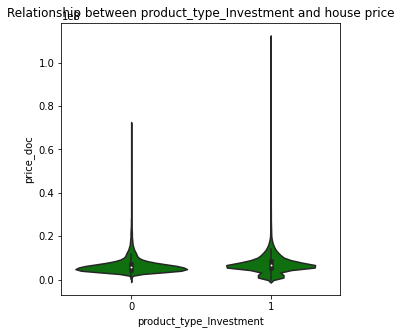

<Figure size 432x288 with 0 Axes>

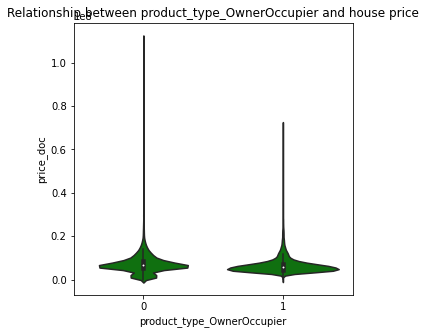

<Figure size 432x288 with 0 Axes>

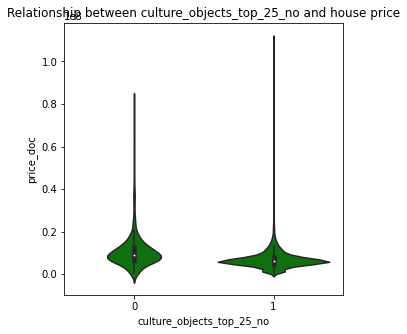

<Figure size 432x288 with 0 Axes>

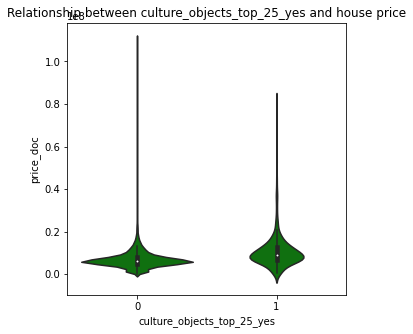

<Figure size 432x288 with 0 Axes>

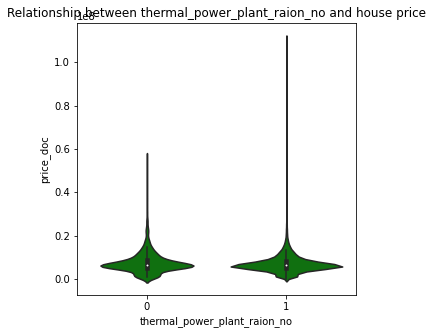

<Figure size 432x288 with 0 Axes>

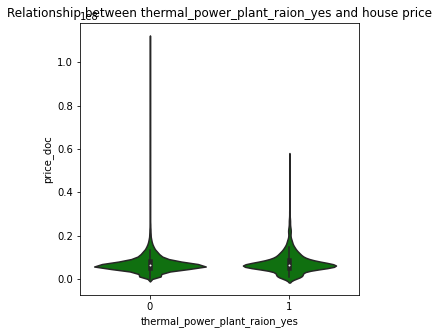

<Figure size 432x288 with 0 Axes>

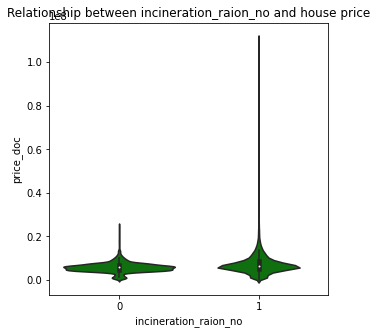

<Figure size 432x288 with 0 Axes>

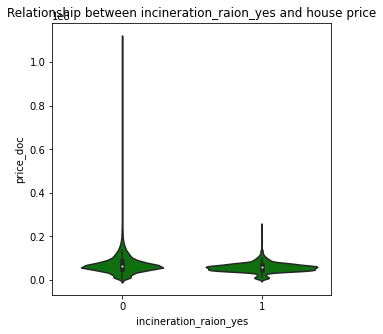

<Figure size 432x288 with 0 Axes>

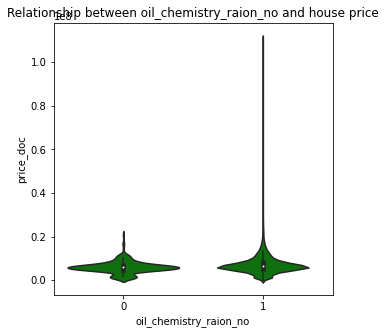

<Figure size 432x288 with 0 Axes>

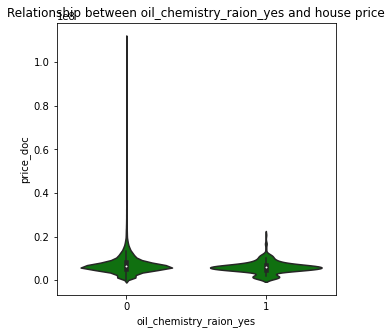

<Figure size 432x288 with 0 Axes>

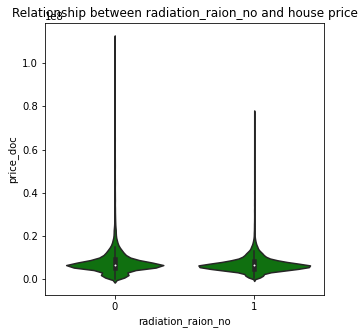

<Figure size 432x288 with 0 Axes>

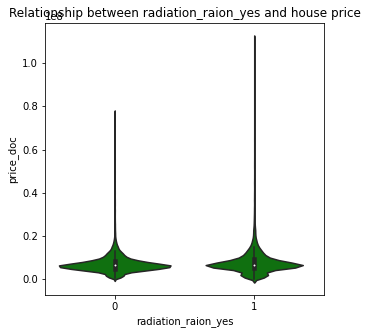

<Figure size 432x288 with 0 Axes>

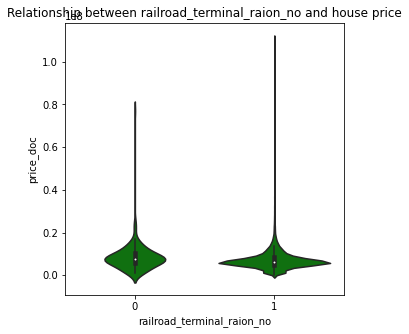

<Figure size 432x288 with 0 Axes>

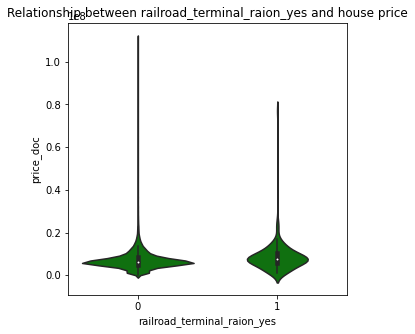

<Figure size 432x288 with 0 Axes>

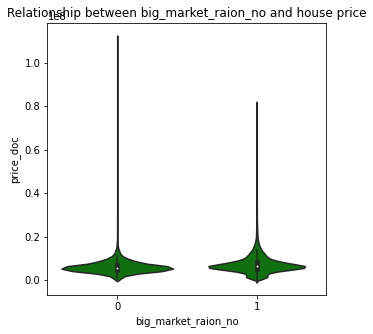

<Figure size 432x288 with 0 Axes>

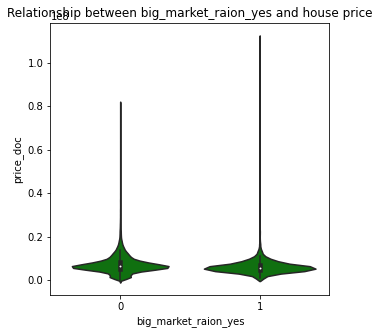

<Figure size 432x288 with 0 Axes>

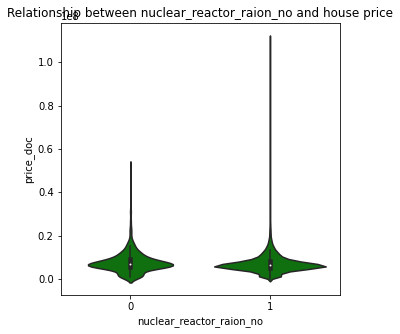

<Figure size 432x288 with 0 Axes>

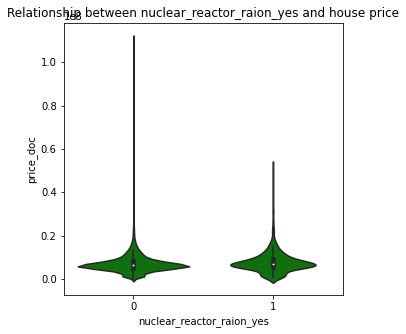

<Figure size 432x288 with 0 Axes>

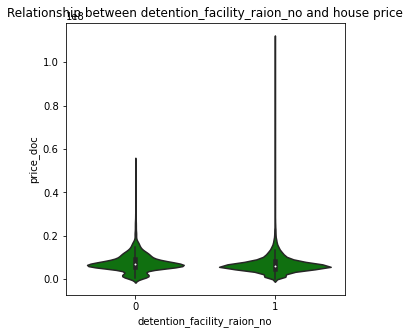

<Figure size 432x288 with 0 Axes>

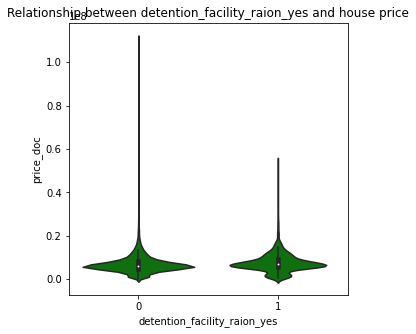

<Figure size 432x288 with 0 Axes>

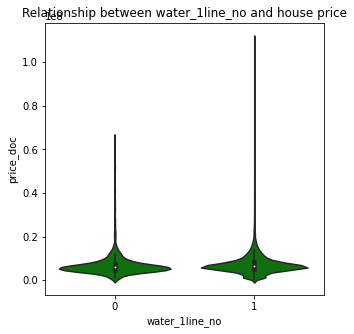

<Figure size 432x288 with 0 Axes>

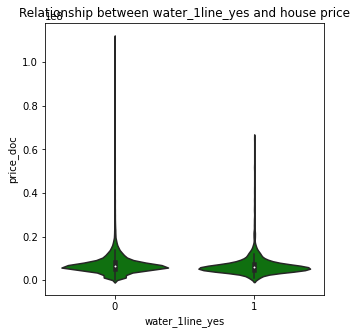

<Figure size 432x288 with 0 Axes>

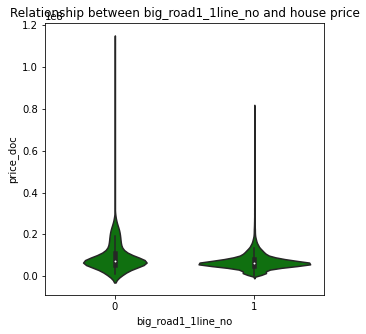

<Figure size 432x288 with 0 Axes>

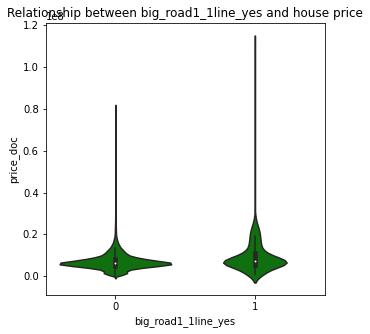

<Figure size 432x288 with 0 Axes>

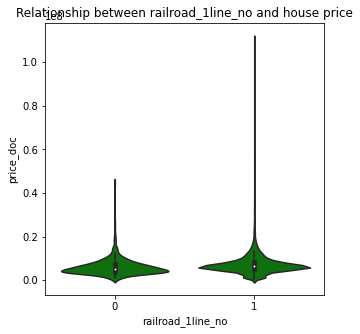

<Figure size 432x288 with 0 Axes>

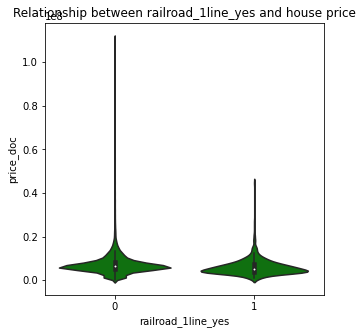

<Figure size 432x288 with 0 Axes>

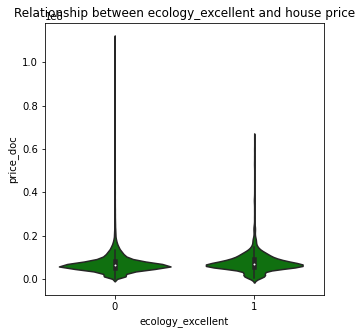

<Figure size 432x288 with 0 Axes>

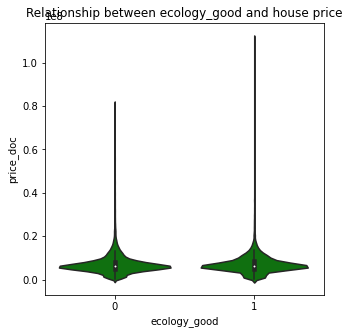

<Figure size 432x288 with 0 Axes>

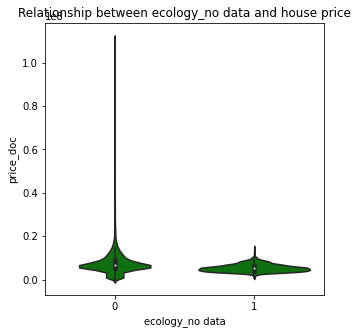

<Figure size 432x288 with 0 Axes>

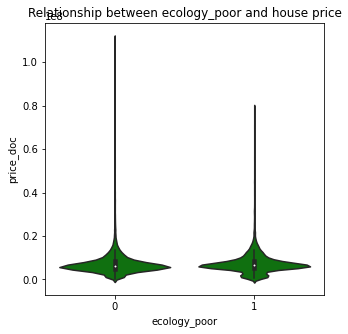

<Figure size 432x288 with 0 Axes>

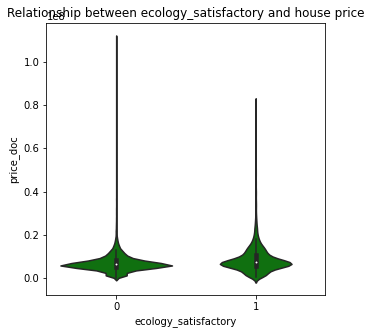

In [63]:
# Violin plot of categorical feature vs. price
for i in cat:
    plt.rcParams.update({'figure.max_open_warning': 0})
    plt.figure(i)
    fig,axes = plt.subplots(figsize=(5,5))
    ax = sns.violinplot(x=fin_df[i], y=fin_df["price_doc"], color='g').set_title("Relationship between %s and house price" %(i)) 

# Regression Modeling & Evaluation

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection as ms
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Splitting into 80% train and 20% test set

In [69]:
from sklearn.model_selection import train_test_split

X = fin_df.drop(columns='price_doc')
y = fin_df['price_doc']

#Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 123)

## Train and test model function 
1. Fitting on the train test
2. Evaluating on the train & test sets using r^2 & MAPE
3. Plotting the residuals & actual vs. predicted prices
4. Identifying the most important features

In [70]:
def train_test_model(model, X_train, y_train, X_test, y_test):

    # Fit model on train set and get r2 scores on both train and test sets
    model.fit(X_train, y_train)
    print('R-squared score (training): {:.3f}'
     .format(model.score(X_train, y_train)))
    print('R-squared score (test): {:.3f}'
     .format(model.score(X_test, y_test)))
    
    # Get mean absolute percentage error (mape)
    y_pred = model.predict(X_test)
    y_pred_tr = model.predict(X_train)
    print('Mean Absolute Percentage Error (train): {:.3f}'
      .format(np.mean(np.abs((y_train - y_pred_tr) / np.abs(y_train)))))
    print('Mean Absolute Percentage Error (test): {:.3f}'
      .format(np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))))
    
    # Plot predicted values vs. residuals 
    resid = y_test - y_pred
    fig,axes = plt.subplots(figsize=(6,6))
    fig.suptitle("Plot of %s regression fitted values vs. residuals" %(str(type(model).__name__)))
    ax = sns.regplot(x=y_pred, y=resid, color='g')
    plt.ylim(-2e7, 5e7)
    plt.xlim(0, 3.2e7)
    ax.set(xlabel='Predicted house price', ylabel='Residuals')

    # Plot actual vs. predicted values
    fig,axes = plt.subplots(figsize=(6,6))
    fig.suptitle("Actual vs Predicted")
    ax = sns.regplot(x=y_test, y=y_pred, color='g')
    plt.ylim(-2e7, 5e7)
    plt.xlim(0, 3.2e7)
    ax.set(xlabel='Actual', ylabel='Predicted')

    # Get most important features (largest 20 coefficients) 
    features = np.array(X_train.columns)
    if 'RandomForestRegressor' in str(model): 
        sorted_coeff_index = model.feature_importances_.argsort()
    else:
        sorted_coeff_index = model.coef_.argsort()
    print('Most important features (largest coefs): \n{}\n'.format(features[sorted_coeff_index[:-21:-1]]))

### Random Forest Regression

R-squared score (training): 0.884
R-squared score (test): 0.691
Mean Absolute Percentage Error (train): 0.239
Mean Absolute Percentage Error (test): 0.443
Most important features (largest coefs): 
['full_sq' 'trc_sqm_3000' 'office_sqm_2000' 'office_km' 'industrial_km'
 'cemetery_km' 'gdp_quart_growth' 'green_part_1000' 'catering_km'
 'park_km' 'prom_part_3000' 'ice_rink_km' 'floor' 'sport_count_1000'
 'fitness_km' 'public_transport_station_min_walk' 'railroad_km'
 'church_synagogue_km' 'kindergarten_km' 'additional_education_km']



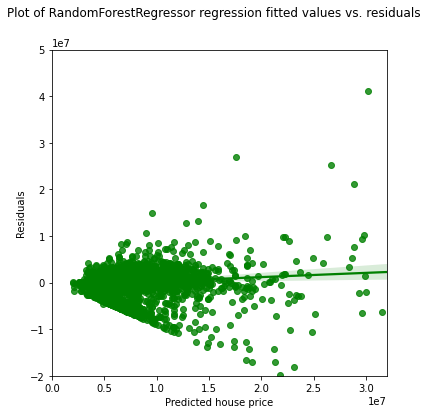

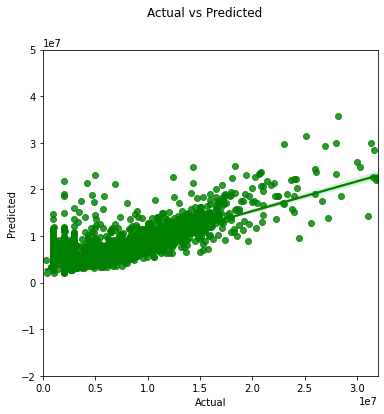

In [71]:
model = RandomForestRegressor(n_estimators=150, min_samples_leaf=3, max_features=0.5, max_depth=50)
train_test_model(model, X_train, y_train, X_test, y_test)

### Linear Regression

R-squared score (training): 0.547
R-squared score (test): 0.552
Mean Absolute Percentage Error (train): 0.505
Mean Absolute Percentage Error (test): 0.518
Most important features (largest coefs): 
['full_sq' 'culture_objects_top_25_yes' 'ecology_satisfactory'
 'railroad_1line_no' 'mosque_count_5000' 'healthcare_centers_raion'
 'ecology_poor' 'oil_chemistry_raion_no' 'green_part_500' 'industrial_km'
 'floor' 'cafe_count_500_price_4000' 'product_type_OwnerOccupier'
 'railroad_km' 'office_sqm_2000' 'mortgage_value'
 'railroad_terminal_raion_no' 'ecology_excellent' 'ID_railroad_terminal'
 'incineration_raion_no']



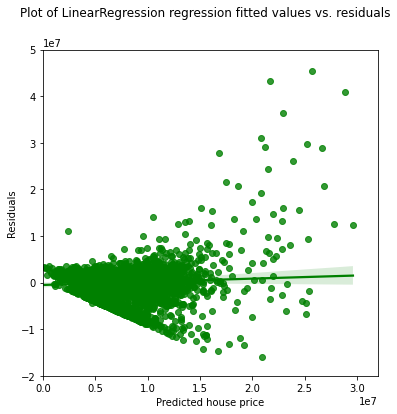

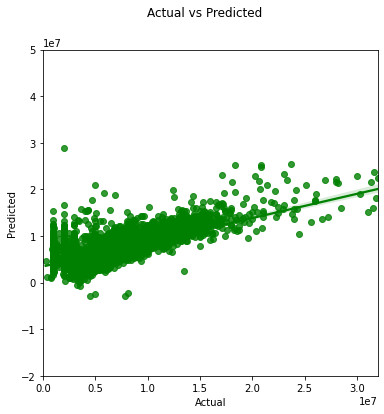

In [72]:
model = LinearRegression()
train_test_model(model, X_train, y_train, X_test, y_test)

### Ridge Regression

R-squared score (training): 0.547
R-squared score (test): 0.552
Mean Absolute Percentage Error (train): 0.505
Mean Absolute Percentage Error (test): 0.518
Most important features (largest coefs): 
['full_sq' 'culture_objects_top_25_yes' 'ecology_satisfactory'
 'railroad_1line_no' 'mosque_count_5000' 'healthcare_centers_raion'
 'ecology_poor' 'oil_chemistry_raion_no' 'green_part_500' 'industrial_km'
 'floor' 'cafe_count_500_price_4000' 'product_type_OwnerOccupier'
 'railroad_km' 'office_sqm_2000' 'mortgage_value'
 'railroad_terminal_raion_no' 'ecology_excellent' 'ID_railroad_terminal'
 'incineration_raion_no']



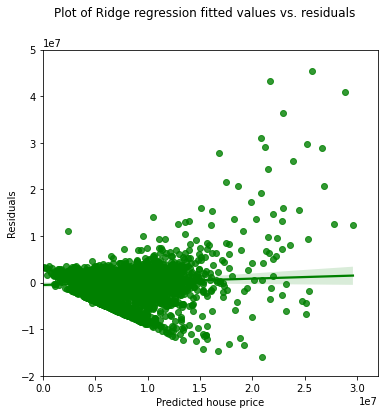

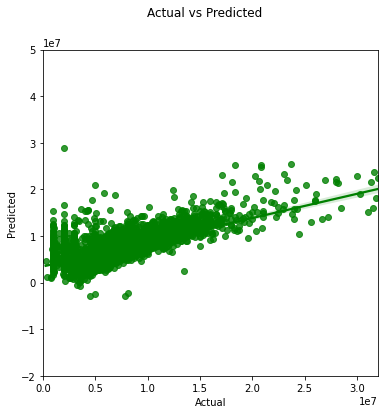

In [73]:
model = Ridge(alpha=1, max_iter=10000)
train_test_model(model, X_train, y_train, X_test, y_test)

### Lasso Regression

R-squared score (training): 0.547
R-squared score (test): 0.552
Mean Absolute Percentage Error (train): 0.505
Mean Absolute Percentage Error (test): 0.518
Most important features (largest coefs): 
['full_sq' 'culture_objects_top_25_yes' 'ecology_satisfactory'
 'railroad_1line_no' 'mosque_count_5000' 'healthcare_centers_raion'
 'ecology_poor' 'oil_chemistry_raion_no' 'green_part_500' 'industrial_km'
 'floor' 'cafe_count_500_price_4000' 'product_type_OwnerOccupier'
 'railroad_km' 'office_sqm_2000' 'mortgage_value'
 'railroad_terminal_raion_no' 'ecology_excellent' 'ID_railroad_terminal'
 'incineration_raion_no']



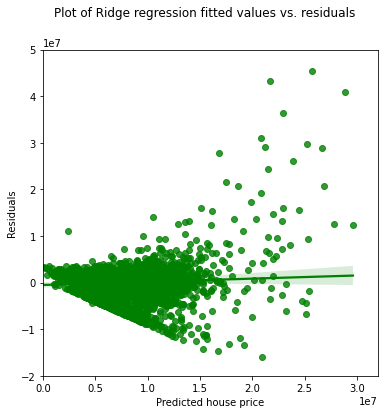

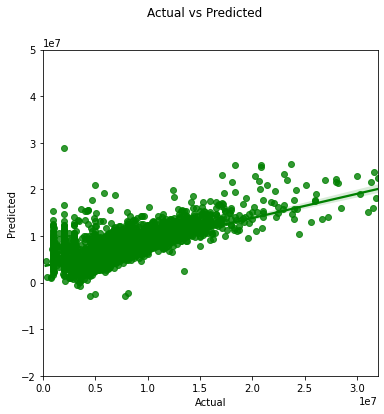

In [74]:
lasso_reg = Lasso(alpha=1, max_iter=10000)
train_test_model(model, X_train, y_train, X_test, y_test)

### Neural Network Regression

In [75]:
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import mean_absolute_error 

In [76]:
model = Sequential()

# The Input Layer :
model.add(Dense(512, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_absolute_percentage_error', optimizer=opt, metrics=['mean_absolute_percentage_error'])
model.summary()

# (5) Train
history = model.fit(X_train, y_train, batch_size=32, epochs=100000, verbose=1, validation_split=0.2, shuffle=True, callbacks=[keras.callbacks.EarlyStopping(patience=100)])

# (6) Evaluate Model
_, mean_absolute_percentage_error = model.evaluate(X_test, y_test)
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               47104     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [77]:
preds = model.predict(X_test)

toPlot = pd.DataFrame()
toPlot['Actual'] = y_test
toPlot['Predicted'] = preds 
toPlot

,Actual,Predicted
index,,
24926,4702896,4976230.50
1114,5100000,3401983.25
25718,7716800,9637934.00
19030,8400000,4350075.00
24708,5700000,4360847.00
...,...,...
9126,16100000,6356639.00
23208,10000000,6326011.50
414,1000000,4068774.25


In [78]:
differences = []
for i in range (len(toPlot)) :
  diff = abs(toPlot.iloc[i][0] - toPlot.iloc[i][1])
  differences.append(diff)

toPlot['Differences'] = differences
toPlot = toPlot.reset_index()
toPlot

,index,Actual,Predicted,Differences
0,24926,4702896,4976230.50,273334.50
1,1114,5100000,3401983.25,1698016.75
2,25718,7716800,9637934.00,1921134.00
3,19030,8400000,4350075.00,4049925.00
4,24708,5700000,4360847.00,1339153.00
...,...,...,...,...
4799,9126,16100000,6356639.00,9743361.00
4800,23208,10000000,6326011.50,3673988.50
4801,414,1000000,4068774.25,3068774.25
4802,24314,3600000,3717183.00,117183.00


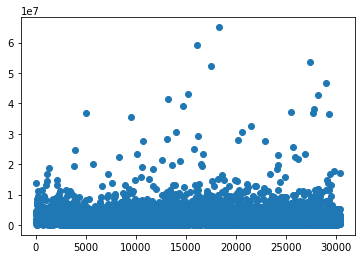

In [79]:
#Plotting the differences, the closer to 0 the better
plt.scatter(toPlot['index'],toPlot['Differences'] )
plt.show()

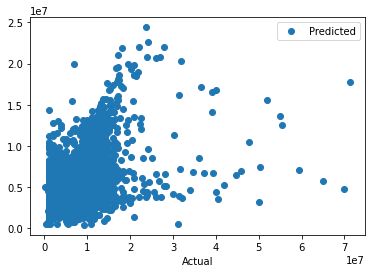

In [80]:
#Plotting the actual values vs the predicted values
#Ideally, the best fit model would have a line of a 45 degree angle
toPlot.plot(x='Actual', y='Predicted', style=['o','rx'])

In [81]:
#Taking a closer look at the neural network using SHAP
!pip install shap
import shap
shap.initjs()

     |████████████████████████████████| 327kB 3.4MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456467 sha256=80d9a79b84873af331a2473b404ccb1bba6c591a8119bd099227c965a226c850
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [82]:
X_explain = X_test[:100] #Here we're only getting a small subset of X_test as large subsets take a very long time to run

In [83]:
explainer = shap.KernelExplainer(model.predict, X_explain)

In [84]:
shap_values = explainer.shap_values(X_explain)

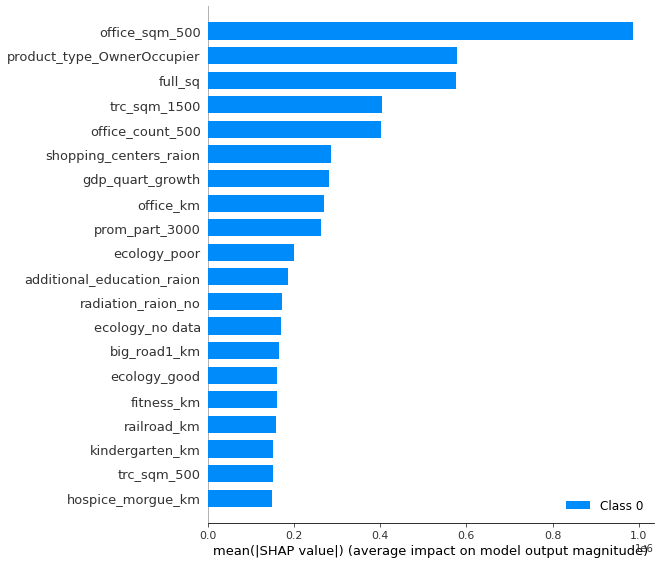

In [85]:
shap.summary_plot(shap_values, X_explain) #Here we are plotting the most significant features for the neural network

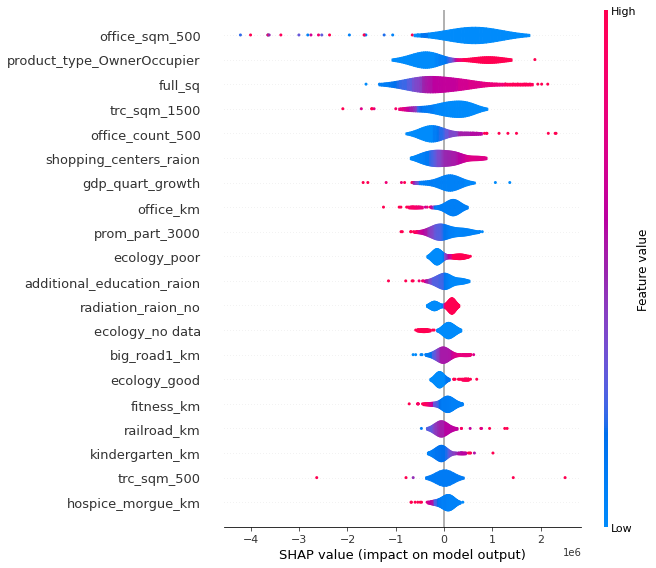

In [86]:
shap.summary_plot(shap_values[0], X_explain, plot_type="violin")

In [87]:
#Looking at an individual instance
#This visualization looks at an individual instance and shows how much each feature contributed to the neural network's decision
shap.initjs() 
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_explain.iloc[0,:])

In [88]:
#Looking at all instances together
#This visualization is an interactive aggregate of all the instaces. 
#It takes each feature and stacks them on top of the other. Further exploring can be done by interacting with the visualization. 
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_explain)